In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
# import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\aamir\AppData\Local\Temp\ipykernel_24988\4211111341.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [17]:
# kcolor 3, with rhc
seed = 45
problem = MaxKColorGenerator().generate(seed=seed, number_of_nodes=10, max_connections_per_node=3, max_colors=3)

rhc = RHCRunner(
    problem=problem,
    experiment_name='kcolor3_rhc',
    seed=seed,
    iteration_list=2 ** np.arange(8),
    restart_list=[50,100,150],
    max_attempts=20
)

df_run_stats, df_run_curves = rhc.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
14,16,0.0,50,0.062464,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",50,128,1
15,32,0.0,50,0.062464,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",50,128,1
16,64,0.0,50,0.062464,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",50,128,1
17,128,0.0,50,0.062464,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",50,128,1
32,16,0.0,50,0.038187,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",100,128,1
33,32,0.0,50,0.038187,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",100,128,1
34,64,0.0,50,0.038187,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",100,128,1
35,128,0.0,50,0.038187,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",100,128,1
50,16,0.0,50,0.061889,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",150,128,1
51,32,0.0,50,0.061889,"[0, 2, 0, 1, 1, 1, 0, 0, 2, 2]",150,128,1


In [18]:
df_run_curves['Fitness'] = -1*df_run_curves['Fitness']

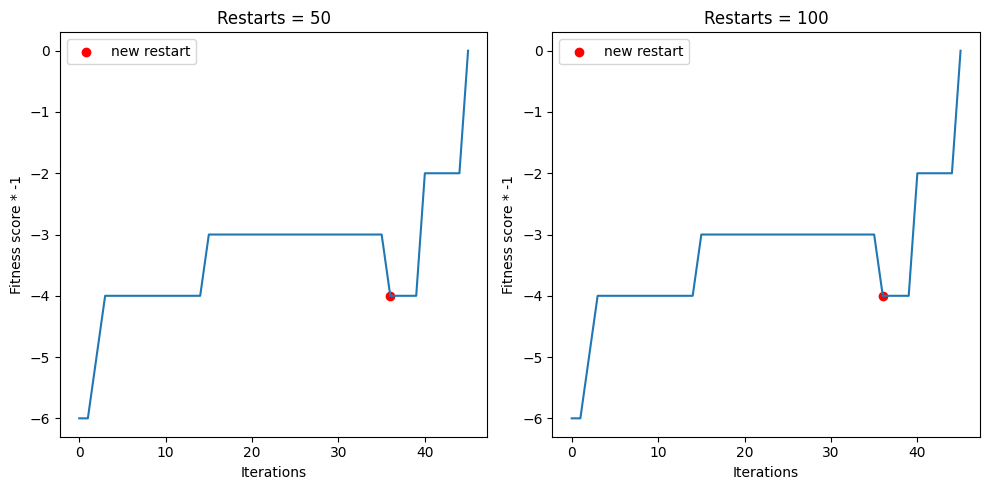

In [19]:
curve_10_restarts = df_run_curves.query('Restarts == 50').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax1.plot(fitness_curve)
ax1.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax1.set_title('Restarts = 50')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Fitness score * -1')
ax1.legend(loc='best')

curve_10_restarts = df_run_curves.query('Restarts == 100').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax2.plot(fitness_curve)
ax2.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax2.set_title('Restarts = 100')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Fitness score * -1')
ax2.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [43]:
# kcolor 4, with rhc
seed = 45
problem = MaxKColorGenerator().generate(seed=seed, number_of_nodes=10, max_connections_per_node=3, max_colors=4)

rhc = RHCRunner(
    problem=problem,
    experiment_name='kcolor4_rhc',
    seed=seed,
    iteration_list=2 ** np.arange(8),
    restart_list=[50,100,150],
    max_attempts=20
)

df_run_stats, df_run_curves = rhc.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))


ERROR:root:Problem restoring SIGNINT handler


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
536,0,0.0,160,0.364952,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
537,1,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
538,2,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
539,4,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
540,8,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
541,16,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
542,32,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
543,64,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116
544,128,0.0,161,0.367363,"[np.int32(2), np.int32(0), np.int32(2), np.int...",150,128,116


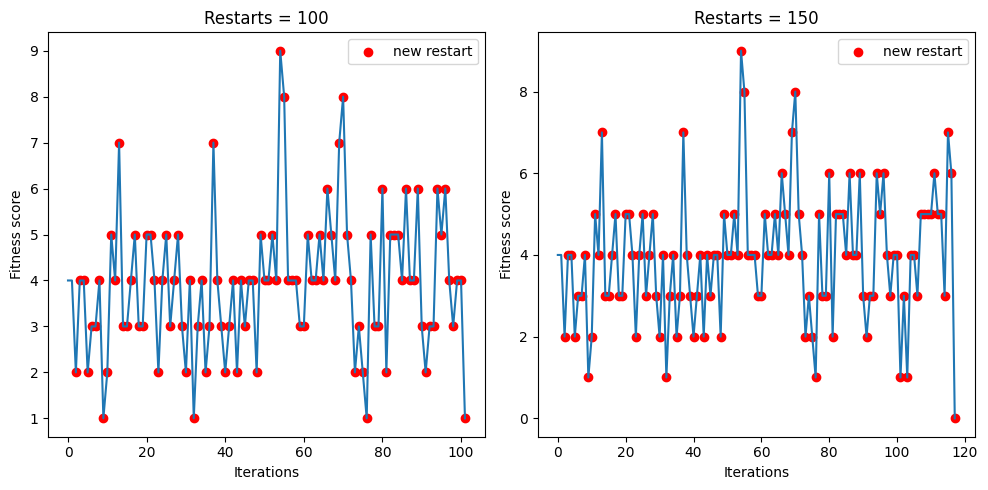

In [44]:
curve_10_restarts = df_run_curves.query('Restarts == 100').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax1.plot(fitness_curve)
ax1.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax1.set_title('Restarts = 100')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Fitness score')
ax1.legend(loc='best')

curve_10_restarts = df_run_curves.query('Restarts == 150').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax2.plot(fitness_curve)
ax2.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax2.set_title('Restarts = 150')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Fitness score')
ax2.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Start of SA

In [67]:
# kcolor 3, with sa
for seed in range(40,46):
    problem = MaxKColorGenerator().generate(seed=seed, number_of_nodes=10, max_connections_per_node=3, max_colors=3)


    sa_geo = SARunner(
        problem=problem,
        experiment_name='kcolor3_sa',
        iteration_list=2 ** np.arange(11),
        temperature_list=[0.1,0.5,2],
        decay_list=[mlrose_hiive.GeomDecay],
        seed=seed
    )

    sa_exp = SARunner(
        problem=problem,
        experiment_name='kcolor3_sa',
        iteration_list=2 ** np.arange(11),
        temperature_list=[0.5,1,2],
        decay_list=[mlrose_hiive.ExpDecay],
        seed=seed
    )

    sa_arith = SARunner(
        problem=problem,
        experiment_name='kcolor3_sa',
        iteration_list=2 ** np.arange(11),
        temperature_list=[2,5,10],
        decay_list=[mlrose_hiive.ArithDecay],
        seed=seed
    )

    df_run_stats, df_run_curves = sa_geo.run()

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness geo= {best_fitness}")
    print(f"Least fevals for best fitness = {df_run_stats.query('Fitness == @best_fitness')['FEvals'].min()}")
    print(f"Length of df_run_curves = {df_run_curves.shape[0]}")

    df_run_stats, df_run_curves = sa_exp.run()

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness exp = {best_fitness}")
    print(f"Least fevals for best fitness = {df_run_stats.query('Fitness == @best_fitness')['FEvals'].min()}")
    print(f"Length of df_run_curves = {df_run_curves.shape[0]}")

    df_run_stats, df_run_curves = sa_arith.run()

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness arith = {best_fitness}")
    print(f"Least fevals for best fitness = {df_run_stats.query('Fitness == @best_fitness')['FEvals'].min()}")
    print(f"Length of df_run_curves = {df_run_curves.shape[0]}")
    print('-'*50)

# Rows having best fitness
# display(df_run_stats.query('Fitness == @best_fitness'))


Best fitness geo= 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness exp = 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness arith = 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
--------------------------------------------------
Best fitness geo= 2.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness exp = 2.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness arith = 2.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
--------------------------------------------------
Best fitness geo= 9.0
Least fevals for best fitness = 0
Length of df_run_curves = 6
Best fitness exp = 9.0
Least fevals for best fitness = 0
Length of df_run_curves = 6
Best fitness arith = 9.0
Least fevals for best fitness = 0
Length of df_run_curves = 6
--------------------------------------------------
Best fitness geo= 6.0
Least fevals for best fitness = 0
Length of df_run_curves

In [64]:
df_run_stats, df_run_curves = sa_geo.run()
df_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000123,6.0,0.0,0.1,1024
1,1,0.001562,6.0,2.0,0.1,1024
2,0,0.000123,6.0,0.0,0.5,1024
3,1,0.001562,6.0,2.0,0.5,1024
4,0,0.000123,6.0,0.0,2,1024
5,1,0.001562,6.0,2.0,2,1024


In [66]:
# kcolor 3, with sa
for seed in range(40,46):
    problem = MaxKColorGenerator().generate(seed=seed, number_of_nodes=10, max_connections_per_node=3, max_colors=4)


    sa_geo = SARunner(
        problem=problem,
        experiment_name='kcolor3_sa',
        iteration_list=2 ** np.arange(11),
        temperature_list=[0.1,0.5,2],
        decay_list=[mlrose_hiive.GeomDecay],
        seed=seed
    )

    sa_exp = SARunner(
        problem=problem,
        experiment_name='kcolor3_sa',
        iteration_list=2 ** np.arange(11),
        temperature_list=[0.5,1,2],
        decay_list=[mlrose_hiive.ExpDecay],
        seed=seed
    )

    sa_arith = SARunner(
        problem=problem,
        experiment_name='kcolor3_sa',
        iteration_list=2 ** np.arange(11),
        temperature_list=[2,5,10],
        decay_list=[mlrose_hiive.ArithDecay],
        seed=seed
    )

    df_run_stats, df_run_curves = sa_geo.run()

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness geo= {best_fitness}")
    print(f"Least fevals for best fitness = {df_run_stats.query('Fitness == @best_fitness')['FEvals'].min()}")
    print(f"Length of df_run_curves = {df_run_curves.shape[0]}")

    df_run_stats, df_run_curves = sa_exp.run()

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness exp = {best_fitness}")
    print(f"Least fevals for best fitness = {df_run_stats.query('Fitness == @best_fitness')['FEvals'].min()}")
    print(f"Length of df_run_curves = {df_run_curves.shape[0]}")

    df_run_stats, df_run_curves = sa_arith.run()

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness arith = {best_fitness}")
    print(f"Least fevals for best fitness = {df_run_stats.query('Fitness == @best_fitness')['FEvals'].min()}")
    print(f"Length of df_run_curves = {df_run_curves.shape[0]}")
    print('-'*50)

# Rows having best fitness
# display(df_run_stats.query('Fitness == @best_fitness'))


Best fitness geo= 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness exp = 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness arith = 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
--------------------------------------------------
Best fitness geo= 5.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness exp = 5.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness arith = 5.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
--------------------------------------------------
Best fitness geo= 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness exp = 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
Best fitness arith = 3.0
Least fevals for best fitness = 2
Length of df_run_curves = 6
--------------------------------------------------
Best fitness geo= 2.0
Least fevals for best fitness = 0
Length of df_run_curves

## Start of GA

In [88]:
# GA for kcolor 3
# seed = 43
for seed in range(40,46):
    problem = MaxKColorGenerator().generate(seed=seed, number_of_nodes=10, max_connections_per_node=3, max_colors=3)


    ga = GARunner(
        problem=problem,
        experiment_name='kcolor3_ga',
        seed=seed,
        iteration_list= 2 ** np.arange(10),
        population_sizes=[25,100,200],
        mutation_rates=[0.2, 0.5],
    )

    df_run_stats, df_run_curves = ga.run()
    print(f"Len curves = {df_run_curves.shape[0]}")

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness = {best_fitness}")

    # Rows having best fitness
    display(df_run_stats.query('Fitness == @best_fitness')[['Population Size', 'Mutation Rate']].drop_duplicates())
    print('-'*50)

Len curves = 12
Best fitness = 0.0


,Population Size,Mutation Rate
9,200,0.2


--------------------------------------------------
Len curves = 12
Best fitness = 1.0


,Population Size,Mutation Rate
1,25,0.2
3,25,0.5
9,200,0.2
11,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 1.0


,Population Size,Mutation Rate
1,25,0.2
3,25,0.5
5,100,0.2
7,100,0.5
9,200,0.2
11,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 1.0


,Population Size,Mutation Rate
7,100,0.5
9,200,0.2
11,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 1.0


,Population Size,Mutation Rate
1,25,0.2
3,25,0.5
5,100,0.2
7,100,0.5
9,200,0.2
11,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 1.0


,Population Size,Mutation Rate
1,25,0.2
3,25,0.5
5,100,0.2
7,100,0.5
9,200,0.2
11,200,0.5


--------------------------------------------------


In [89]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001209,6.0,25.0,25,0.2,512
1,1,0.004462,1.0,52.0,25,0.2,512
2,0,0.001209,6.0,25.0,25,0.5,512
3,1,0.004462,1.0,52.0,25,0.5,512
4,0,0.001209,6.0,100.0,100,0.2,512
5,1,0.004462,1.0,202.0,100,0.2,512
6,0,0.001209,6.0,100.0,100,0.5,512
7,1,0.004462,1.0,202.0,100,0.5,512
8,0,0.001209,6.0,200.0,200,0.2,512
9,1,0.004462,1.0,402.0,200,0.2,512


In [87]:
# GA for kcolor 4
# seed = 43
for seed in range(40,46):
    problem = MaxKColorGenerator().generate(seed=seed, number_of_nodes=10, max_connections_per_node=3, max_colors=4)


    ga = GARunner(
        problem=problem,
        experiment_name='kcolor3_ga',
        seed=seed,
        iteration_list= 2 ** np.arange(10),
        population_sizes=[25,100,200],
        mutation_rates=[0.2, 0.5],
    )

    df_run_stats, df_run_curves = ga.run()
    print(f"Len curves = {df_run_curves.shape[0]}")

    best_fitness = df_run_stats['Fitness'].min()
    print(f"Best fitness = {best_fitness}")

    # Rows having best fitness
    display(df_run_stats.query('Fitness == @best_fitness')[['Population Size', 'Mutation Rate']].drop_duplicates())
    print('-'*50)

Len curves = 12
Best fitness = 0.0


,Population Size,Mutation Rate
9,200,0.2
20,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 0.0


,Population Size,Mutation Rate
5,100,0.2
16,100,0.5
27,200,0.2
38,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 1.0


,Population Size,Mutation Rate
5,100,0.2
9,200,0.2
11,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 0.0


,Population Size,Mutation Rate
5,100,0.2
16,100,0.5
27,200,0.2
38,200,0.5


--------------------------------------------------
Len curves = 12
Best fitness = 0.0


,Population Size,Mutation Rate
7,100,0.5
18,200,0.2


--------------------------------------------------
Len curves = 12
Best fitness = 0.0


,Population Size,Mutation Rate
5,100,0.2
16,100,0.5
27,200,0.2
38,200,0.5


--------------------------------------------------


Based on running using multiple seeds, pop 200 and mut rate 0.2 seems to be working the best

In [85]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001130,6.0,25.0,25,0.1,512
1,1,0.018684,1.0,52.0,25,0.1,512
2,0,0.001130,6.0,25.0,25,0.2,512
3,1,0.018684,1.0,52.0,25,0.2,512
4,0,0.001130,6.0,100.0,100,0.1,512
5,1,0.018684,1.0,202.0,100,0.1,512
6,0,0.001130,6.0,100.0,100,0.2,512
7,1,0.018684,1.0,202.0,100,0.2,512
8,0,0.001130,6.0,200.0,200,0.1,512
9,1,0.018684,1.0,402.0,200,0.1,512
